# 함수형 API 실습 - UTKFace 데이터 세트

이 노트북은 아래 문서에 실려 있는 예제를 실습하면서 작성한 것입니다.

* [Developing Complex Deep Learning Models Using Keras Functional API](https://medium.com/@sachinsoni600517/developing-complex-deep-learning-models-using-keras-functional-api-3b9e867bb155) - Sachinsoni

In [2]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.models import Model

input_shape = (128, 128, 1)
inputs = Input((input_shape))

conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs)
maxp_1 = MaxPooling2D(pool_size=(2, 2))(conv_1)
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu')(maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2, 2))(conv_2)
conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu')(maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2, 2))(conv_3)
conv_4 = Conv2D(256, kernel_size=(3, 3), activation='relu')(maxp_3)
maxp_4 = MaxPooling2D(pool_size=(2, 2))(conv_4)
conv_5 = Conv2D(256, kernel_size=(3, 3), activation='relu')(maxp_4)
maxp_5 = MaxPooling2D(pool_size=(2, 2))(conv_5)

flatten = Flatten()(maxp_5)

dense_1 = Dense(256, activation='relu')(flatten)
dense_2 = Dense(256, activation='relu')(flatten)

dropout_1 = Dropout(0.3)(dense_1)
dropout_2 = Dropout(0.3)(dense_2)

output_1 = Dense(1, activation='sigmoid', name='gender_out')(dropout_1)
output_2 = Dense(1, activation='linear', name='age_out')(dropout_2)

model = Model(inputs=[inputs], outputs=[output_1, output_2])
model.compile(optimizer='adam', loss=['binary_crossentropy', 'mae'], metrics=['accuracy'])

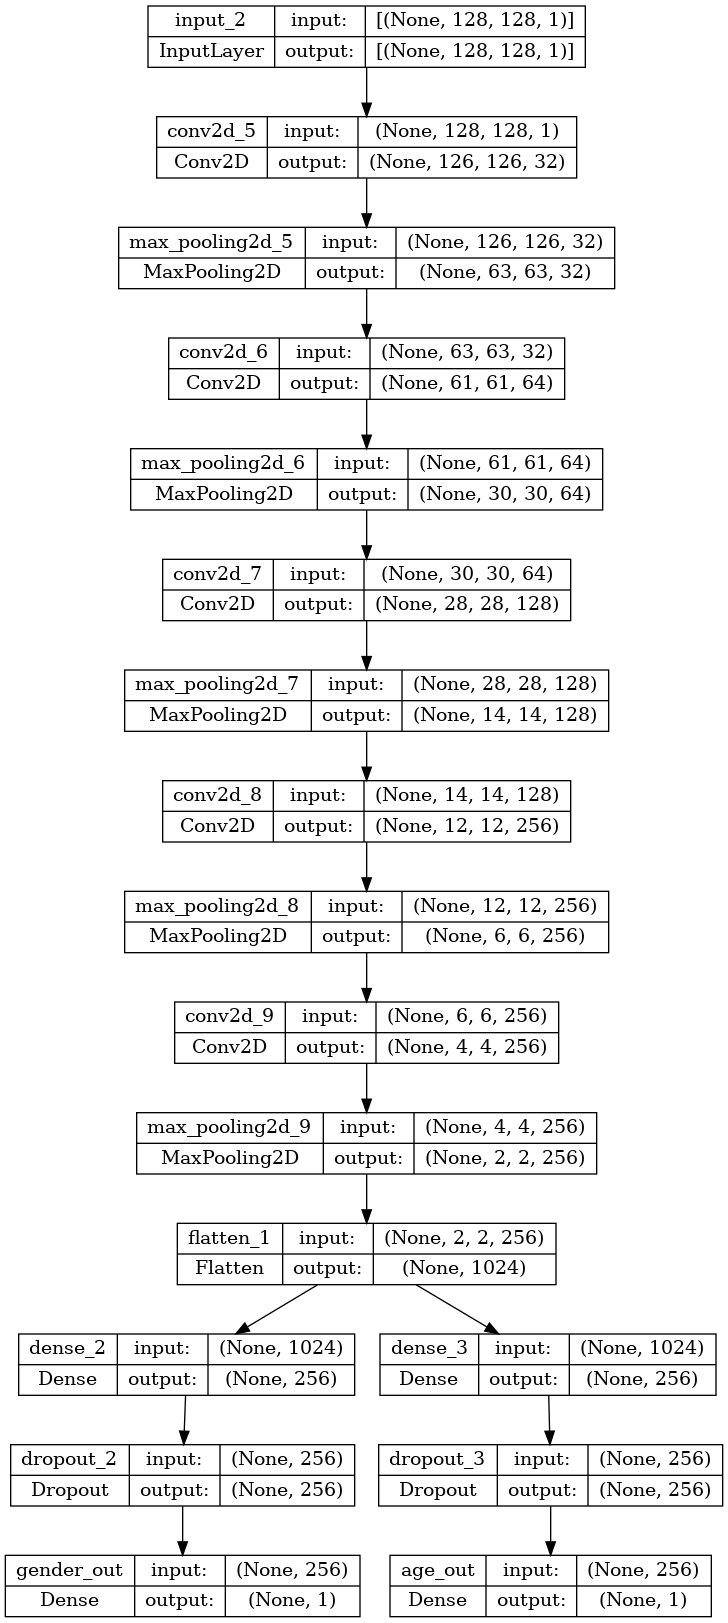

In [5]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)